# Step 2. Diagram rewriting

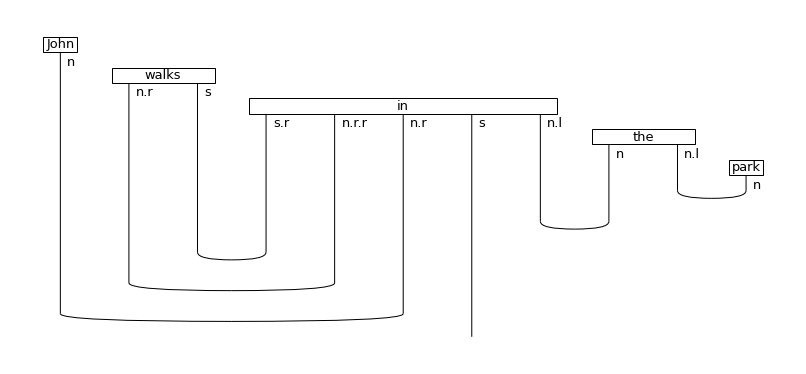

In [1]:
from lambeq import BobcatParser

# Parse the sentence
parser = BobcatParser(verbose='suppress')
diagram = parser.sentence2diagram("John walks in the park")

diagram.draw(figsize=(11,5), fontsize=13)

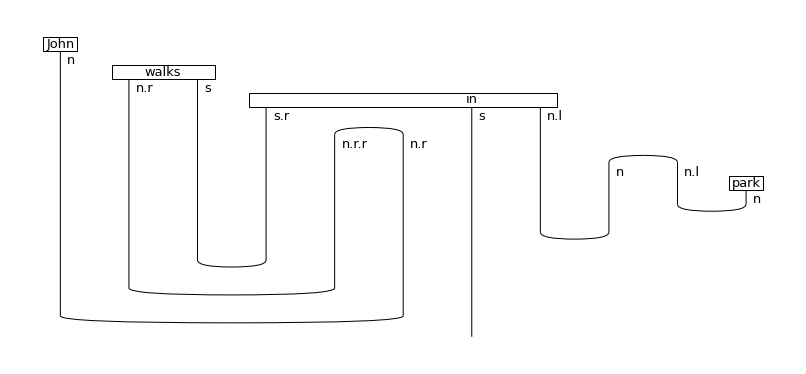

In [2]:
from lambeq import Rewriter

# Apply rewrite rule for prepositional phrases

rewriter = Rewriter(['prepositional_phrase', 'determiner'])
rewritten_diagram = rewriter(diagram)

rewritten_diagram.draw(figsize=(11,5), fontsize=13)

We will now ask `lambeq` to normalise the diagram, by "stretching" the wires and re-arranging the boxes if required:

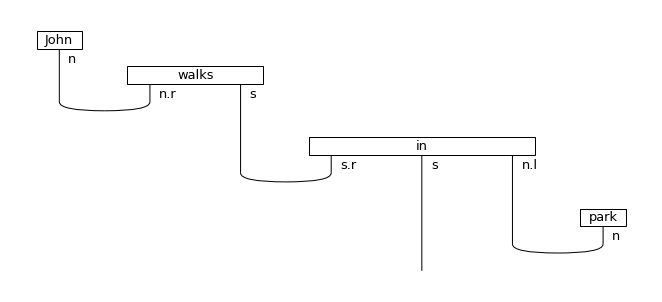

In [3]:
normalised_diagram = rewritten_diagram.normal_form()
normalised_diagram.draw(figsize=(9,4), fontsize=13)

In the simplified diagram, the order of the preposition tensor is reduced by 2, which at least for a classical experiment, is a substantial improvement. Note also that the determiner is now eliminated, equating the meaning of the noun phrase "the park" with that of the noun "park".

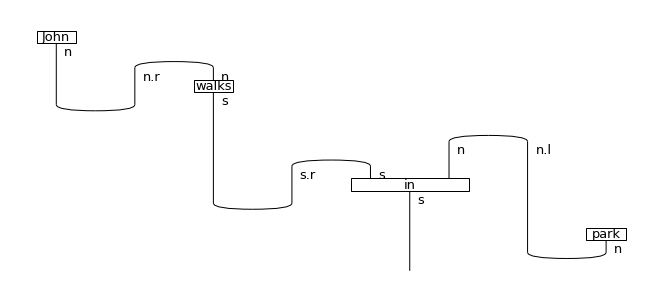

In [4]:
curry_functor = Rewriter(['curry'])
curried_diagram = curry_functor(normalised_diagram)
curried_diagram.draw(figsize=(9,4), fontsize=13)

After normalisation the resulting diagram no longer contains any cups, which eliminates :term:`post-selection` and allows for faster execution.

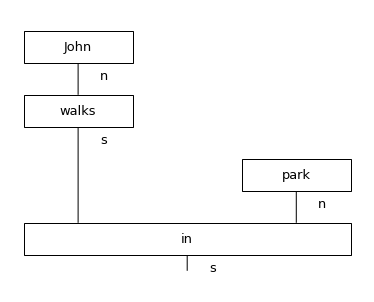

In [5]:
curried_diagram.normal_form().draw(figsize=(5,4), fontsize=13)

| Rewrite rule                                 | Description                                                                    |
| -------------------------------------------- | ------------------------------------------------------------------------------ |
| `auxiliary`                                  | Removes auxiliary verbs (such as "do") by replacing them with caps.            |
| `connector`                                  | Removes sentence connectors (such as "that") by replacing them with caps.      |
| `coordination`                               | Simplifies "and" by replacing it with a layer of interleaving spiders.         |
| `curry`                                      | Uses map-state duality to reduce the number of cups in the diagram.            |
| `determiner`                                 | Removes determiners (such as "the") by replacing them with caps.               |
| `object_rel_pronoun` , `subject_rel_pronoun` | Simplifies relative pronouns (such as "that") using cups, spiders and a loop.  |
| `postadverb` , `preadverb`                   | Simplifies adverbs by passing through the noun wire transparently using a cap. |
| `prepositional_phrase`                       | Simplifies prepositions by passing through the noun wire using a cap.          |